In [2]:
import numpy as np
import pandas as pd
import altair as alt
import os as os
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [3]:
os.getcwd()

'/home/dkruszew/Documents/labs/DSCI-532-Group108/scr'

In [4]:
df = pd.read_csv('../data/crimedata_csv_all_years.csv')

In [5]:
df['DATE'] = pd.to_datetime({'year':df['YEAR'],
                            'month':df['MONTH'],
                            'day':df['DAY'],
                            'hour':df['HOUR']})
dofw = pd.DataFrame({'day_of_week': ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                    'day_index': [1,2,3,4,5,6,7]})
df['day_of_week'] = pd.DatetimeIndex(df['DATE']).day_name()
df = pd.merge(df, dofw, how="left", on="day_of_week")

In [6]:
(df.groupby(['TYPE', 'NEIGHBOURHOOD']).count()/df.groupby(['TYPE']).count())[['DAY']].max()

DAY    0.37681
dtype: float64

In [7]:
df_line = df.query('TYPE == "Break and Enter Commercial"').groupby(['YEAR']).count().reset_index()

In [8]:
df_line.head()

,YEAR,TYPE,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,2003,3197,3197,3197,3197,3197,3197,3197,3197,3197
1,2004,3283,3283,3283,3283,3283,3283,3283,3283,3283
2,2005,2639,2639,2639,2639,2639,2639,2638,2639,2639
3,2006,2844,2844,2844,2844,2844,2844,2844,2844,2844
4,2007,2436,2436,2436,2436,2436,2436,2434,2436,2436


In [7]:
df['TYPE'].unique()

array(['Break and Enter Commercial', 'Break and Enter Residential/Other',
       'Homicide', 'Mischief', 'Offence Against a Person', 'Other Theft',
       'Theft from Vehicle', 'Theft of Bicycle', 'Theft of Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Vehicle Collision or Pedestrian Struck (with Injury)'],
      dtype=object)

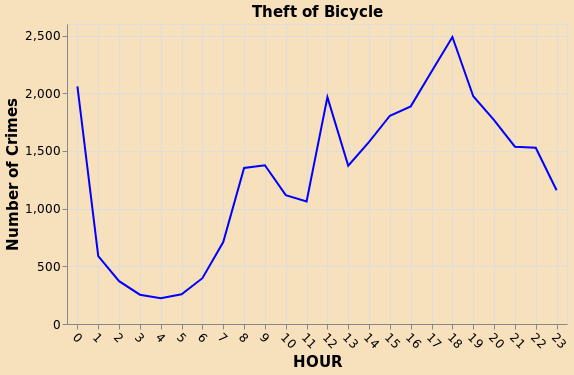

In [36]:
time_scale = "HOUR"
crime = "Theft of Bicycle"
neighbourhood = "ALL"

if neighbourhood != "ALL":
    if crime != "ALL":
        df_line = df.query('TYPE == @crime & NEIGHBOURHOOD == @neighbourhood').groupby([time_scale]).count().reset_index()
    else:    
        df_line = df.query('NEIGHBOURHOOD == @neighbourhood').groupby([time_scale]).count().reset_index()
else:
    if crime != "ALL":
        df_line = df.query('TYPE == @crime').groupby([time_scale]).count().reset_index()
    else:
        df_line = df.groupby([time_scale]).count().reset_index() 
    
alt.Chart(df_line).mark_line().encode(
    alt.X(time_scale+':N'),
    alt.Y('TYPE:Q', title='Number of Crimes'),
    alt.Color(value="blue")
).configure(
    background='#f7e0bc' #HEX color code
).configure_axisX(
    labelAngle=45,
    grid=True
).configure_axis(
    labelFontSize=12,
    titleFontSize=15
).configure_title(
    fontSize=15
).properties(
height=300,
width=500,
title=crime
)